In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [128]:
df = pd.read_csv("results.csv")
len_df = len(df)
df.head()

,Unnamed: 0,iteration,grasp_status,total_time,solution_time_sim,solution_time_real,solution_time_offset,grasp_pose_time,grasp_pose_estimate,offset,grip_time
0,0,1,SUCCESS,5.663,0.075,0.096506,0.021506,2.572,2.419455,0.152545,1.346
1,1,2,SUCCESS,5.938,0.058,0.069642,0.011642,2.876,2.792265,0.083735,1.291
2,2,3,SUCCESS,5.721,0.063,0.077506,0.014506,2.689,2.566714,0.122286,1.310
3,3,4,SUCCESS,5.960,0.038,0.061637,0.023637,2.967,2.841064,0.125936,1.276
4,4,5,SUCCESS,5.625,0.039,0.060826,0.021826,2.639,2.551007,0.087993,1.294


### Total Time

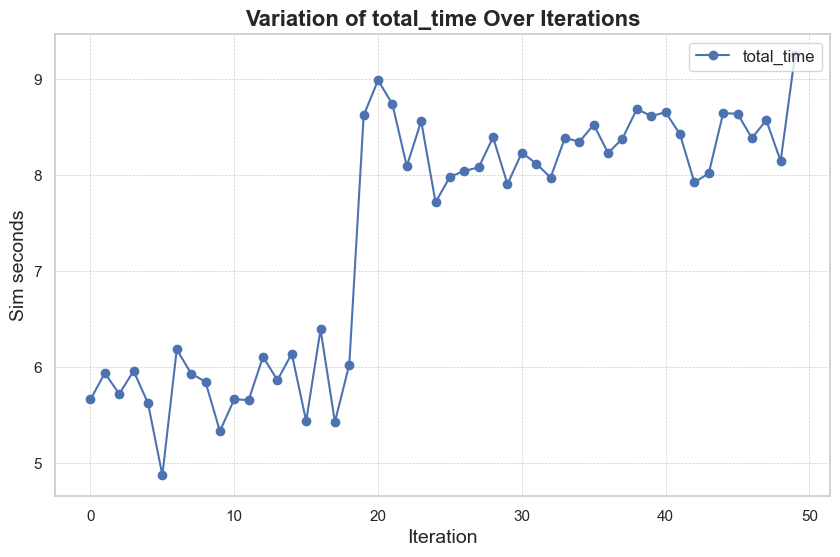

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(df['total_time'], label='total_time', marker='o')

plt.title('Variation of total_time Over Iterations', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Sim seconds', fontsize=14)
plt.legend(fontsize=12, loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(f"total_time{len_df}.png")
plt.show()

### Solution calculation time

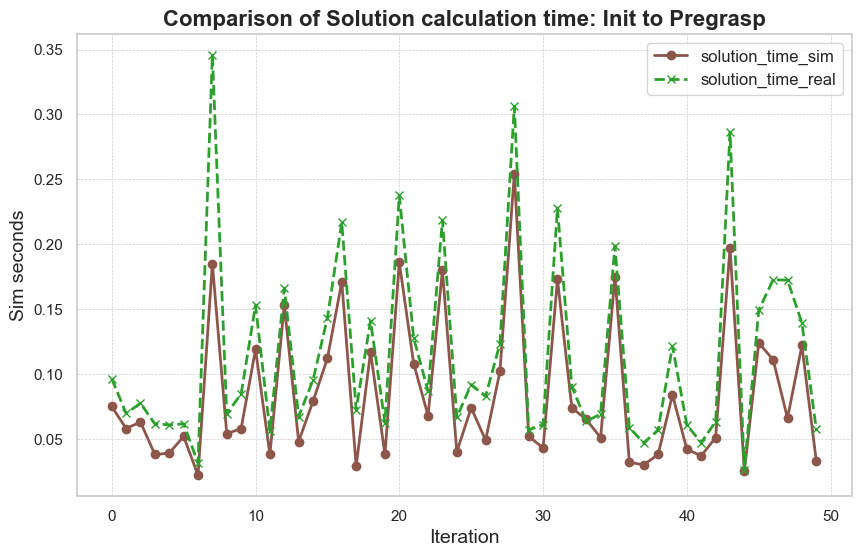

In [130]:
plt.figure(figsize=(10, 6))
plt.title('Comparison of Solution calculation time: Init to Pregrasp')
plt.plot(df['solution_time_sim'], label='solution_time_sim', marker='o', linestyle='-', linewidth=2, color=sns.color_palette("tab10")[5])
plt.plot(df['solution_time_real'], label='solution_time_real', marker='x', linestyle='--', linewidth=2, color=sns.color_palette("tab10")[2])

plt.title('Comparison of Solution calculation time: Init to Pregrasp', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Sim seconds', fontsize=14)

plt.legend(fontsize=12, loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(f"solution_time_sim_real{len_df}.png")

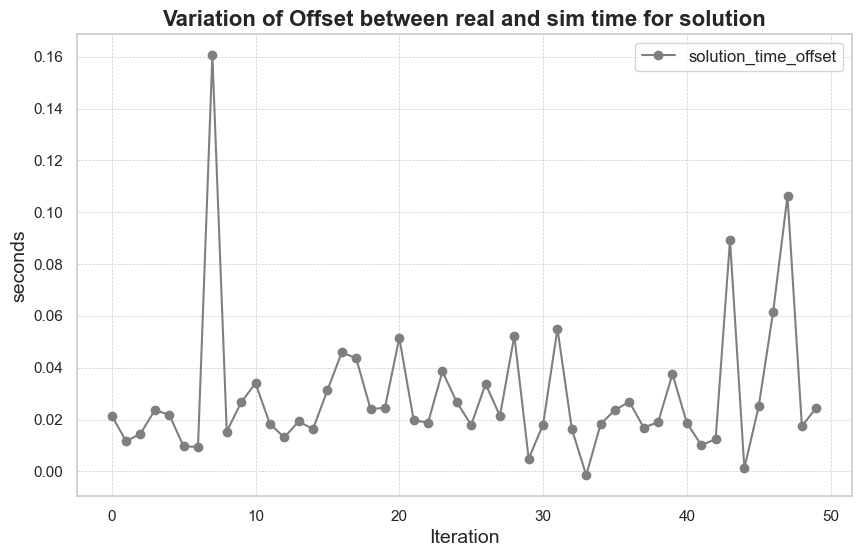

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(df['solution_time_offset'], label='solution_time_offset', marker='o', color=sns.color_palette("tab10")[7])

plt.title('Variation of Offset between real and sim time for solution', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('seconds', fontsize=14)
plt.legend(fontsize=12, loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(f"solution_time_offset{len_df}.png")

### Pregrasp movement

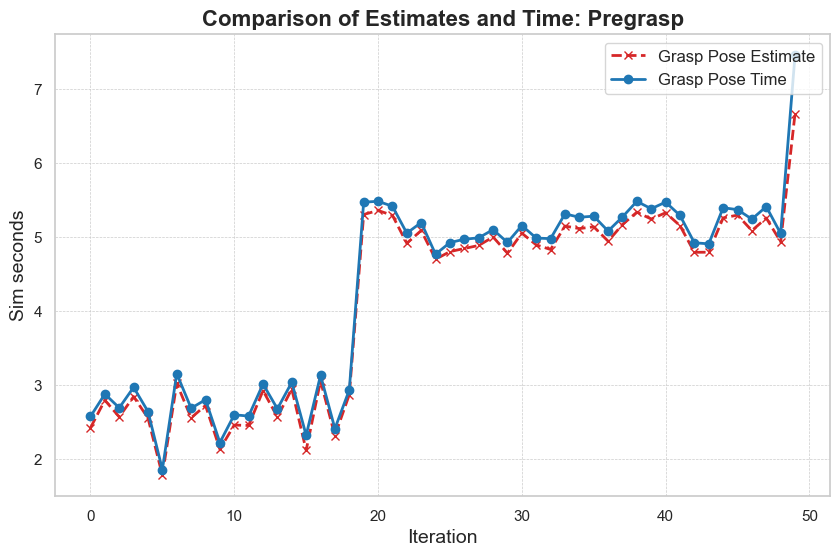

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(df['grasp_pose_estimate'], label='Grasp Pose Estimate', marker='x', linestyle='--', linewidth=2, color=sns.color_palette("tab10")[3])
plt.plot(df['grasp_pose_time'], label='Grasp Pose Time', marker='o', linestyle='-', linewidth=2, color=sns.color_palette("tab10")[0])

plt.title('Comparison of Estimates and Time: Pregrasp', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Sim seconds', fontsize=14)

plt.legend(fontsize=12, loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(f"grasp_pose_estimate_time{len_df}.png")

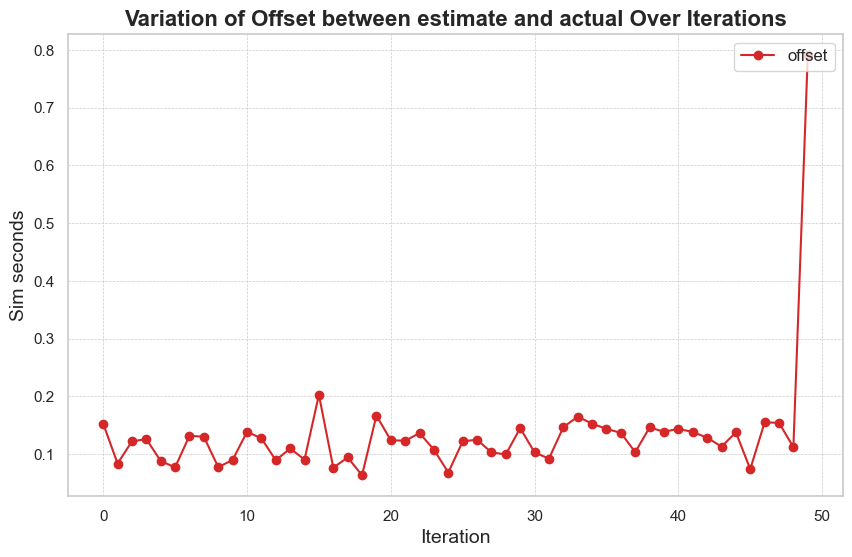

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(df['offset'], label='offset', marker='o', color=sns.color_palette("tab10")[3])

plt.title('Variation of Offset between estimate and actual Over Iterations', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Sim seconds', fontsize=14)
plt.legend(fontsize=12, loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(f"offset{len_df}.png")

### Gripping

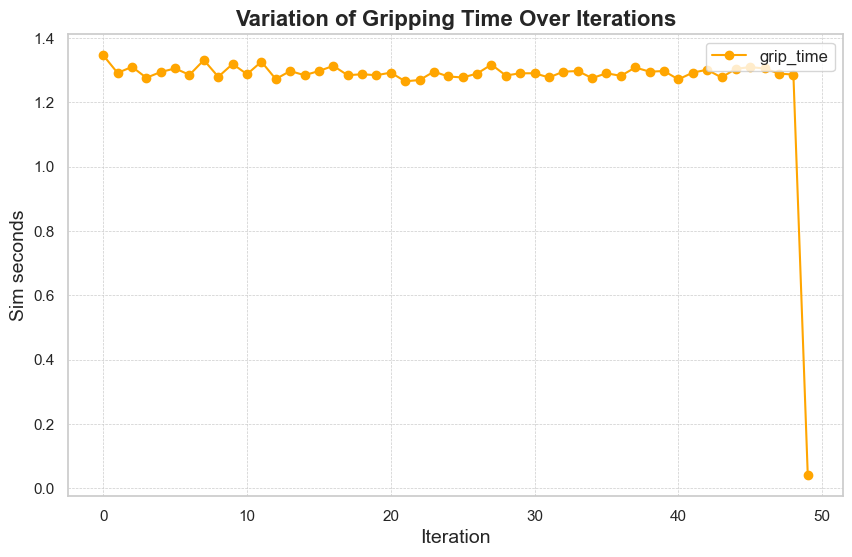

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(df['grip_time'], label='grip_time', marker='o', color="orange")

plt.title('Variation of Gripping Time Over Iterations', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Sim seconds', fontsize=14)
plt.legend(fontsize=12, loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(f"grip_time{len_df}.png")

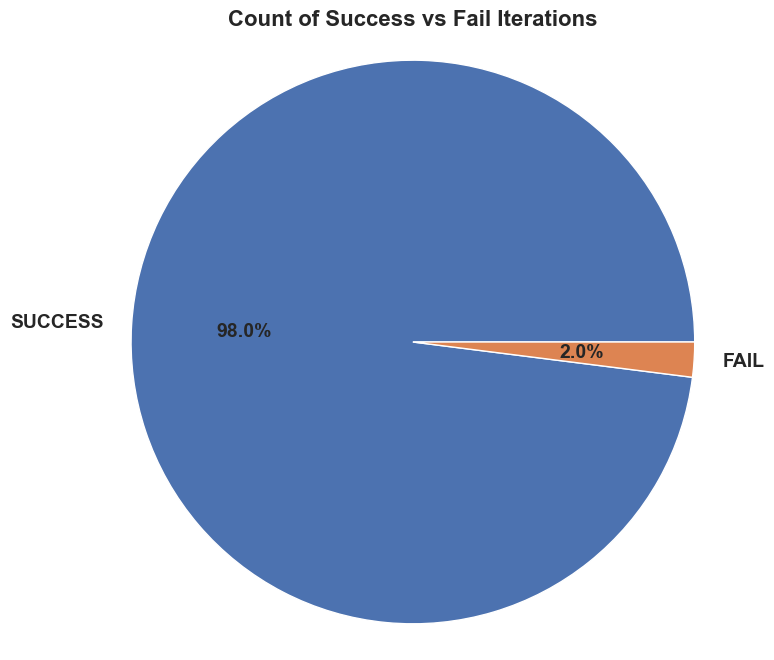

In [135]:
status_count = df['grasp_status'].value_counts()

labels = status_count.index
sizes = status_count.values
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=00,
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)
plt.title('Count of Success vs Fail Iterations', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.savefig(f"success_fail{len_df}.png")